# 📌 Estudo Comparativo de Métodos Numéricos

Vamos encontrar uma raiz real da função cúbica:

\[ f(x) = x^3 - x - 2 \]

Utilizando três métodos numéricos:
- Bisseção
- Newton-Raphson
- Secante

Critério de parada: erro < 0.001

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

## 🔁 Método da Bisseção

In [2]:
def bissecao(a, b, tol=0.001, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Intervalo inválido: f(a) e f(b) devem ter sinais opostos.")
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return c, i + 1
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter

## 🧠 Método de Newton-Raphson

In [3]:
def newton_raphson(x0, tol=0.001, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Derivada nula.")
        x_next = x - fx / dfx
        if abs(x_next - x) < tol:
            return x_next, i + 1
        x = x_next
    return x, max_iter

## 🧮 Método da Secante

In [4]:
def secante(x0, x1, tol=0.001, max_iter=100):
    for i in range(max_iter):
        if f(x1) - f(x0) == 0:
            raise ZeroDivisionError("Divisão por zero.")
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2, i + 1
        x0, x1 = x1, x2
    return x2, max_iter

## 📊 Execução e Comparação

In [5]:
raiz_biss, it_biss = bissecao(1, 2)
raiz_newt, it_newt = newton_raphson(1.5)
raiz_sec, it_sec = secante(1, 2)

print(f"Bisseção: raiz ≈ {raiz_biss:.5f}, iterações: {it_biss}")
print(f"Newton-Raphson: raiz ≈ {raiz_newt:.5f}, iterações: {it_newt}")
print(f"Secante: raiz ≈ {raiz_sec:.5f}, iterações: {it_sec}")

Bisseção: raiz ≈ 1.52148, iterações: 9
Newton-Raphson: raiz ≈ 1.52138, iterações: 2
Secante: raiz ≈ 1.52138, iterações: 5


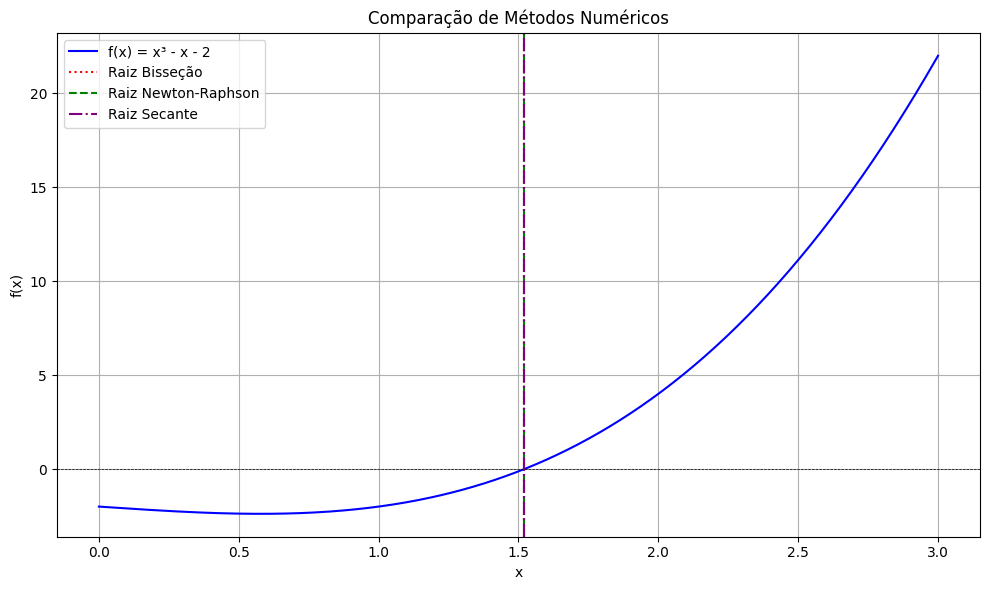

In [6]:
x_vals = np.linspace(0, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = x³ - x - 2", color="blue")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(raiz_biss, color='red', linestyle=':', label='Raiz Bisseção')
plt.axvline(raiz_newt, color='green', linestyle='--', label='Raiz Newton-Raphson')
plt.axvline(raiz_sec, color='purple', linestyle='-.', label='Raiz Secante')
plt.title("Comparação de Métodos Numéricos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## ✅ Conclusão

- Todos os métodos convergiram para a mesma raiz (≈ 1.5214).
- Newton-Raphson foi o mais rápido (2 iterações), seguido da Secante (5) e da Bisseção (9).
- Cada método tem seu ponto forte: a Bisseção é garantida, o Newton é rápido, e a Secante não precisa da derivada.